### Ensemble Technique on Placement Dataset which is follow regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("placement.csv")

In [3]:
data.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [4]:
data.isnull().sum()

cgpa       0
package    0
dtype: int64

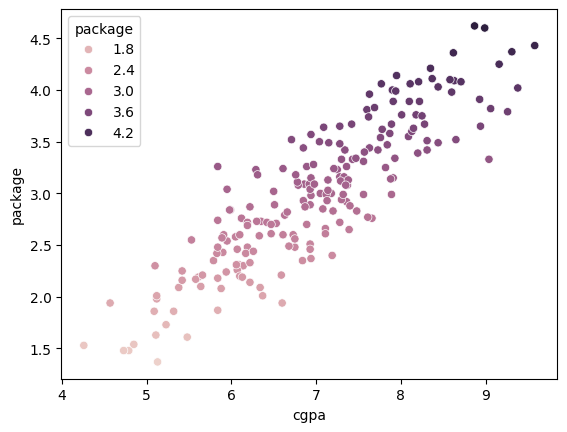

In [5]:
sns.scatterplot(x="cgpa", y="package",data=data,hue="package")
plt.show()

In [6]:
X= data.iloc[:,:-1]
Y=data["package"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [10]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)*100, lr.score(X_test,Y_test)*100

(77.58339025733345, 77.30984312051673)

In [11]:
lr.predict([[6.8]])

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.87793708])

In [12]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)*100, dt.score(X_test,Y_test)*100

(95.1559200955432, 52.19733481708333)

In [13]:
dt.predict([[6.8]])

C:\Users\Utkarsha\Documents\ENV\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3.11])

In [14]:
#Hyper parameter tunning apply on Decision tree
from sklearn.model_selection import GridSearchCV

In [15]:
df1={"criterion":["squared_error"],
    "splitter":["best"],
    "max_depth":[i for i in range(2,20)]}

In [16]:
gd=GridSearchCV(DecisionTreeRegressor(),param_grid=df1)
gd.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best']})

In [17]:
gd.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'splitter': 'best'}

In [18]:
gd.best_score_

np.float64(0.7170618015299187)

In [19]:
decisiontree=DecisionTreeRegressor(criterion='squared_error', max_depth= 3, splitter= 'best')
decisiontree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
decisiontree.score(X_test,Y_test)*100

73.87269145631467

In [22]:
#svm=SVR(kernel='linear')
svm=SVR(kernel='linear')
svm.fit(X_train,Y_train)
svm.score(X_train,Y_train)*100, svm.score(X_test,Y_test)*100

(77.45351616879739, 77.06668029575103)

In [ ]:
# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df2= {"kernel" : ["linear", "poly", "rbf", "sigmoid", "precomputed"]}

In [ ]:
gd_svm=GridSearchCV(SVR(),param_grid=df2)
gd_svm.fit(X_train,Y_train)

In [ ]:
gd_svm.be

### Voting Regressor
To improve accuracy or reduce overfitting

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
li=[("lr1", LinearRegression()),("dt1",DecisionTreeRegressor()),("svm1",SVR())]

In [ ]:
vc= VotingRegressor(li)
vc.fit(X_train,Y_train)

In [ ]:
vc.score(X_train,Y_train)*100, vc.score(X_test,Y_test)*100

In [ ]:
df={"lr":lr.predict(X_test),"dt":dt.predict(X_test),"svm":svm.predict(X_test),"vc":vc.predict(X_test)}

In [ ]:
pd.DataFrame(df).head(3)

In [ ]:
(2.780313	+2.9200	+2.745462)/3